In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Download the data set data.csv from the Resources tab
happiness = pd.read_csv("C:/Users/David Framil/data.csv") #change path if needed
#Import the data as a pandas DataFrame
happiness = pd.DataFrame(happiness)

In [3]:
# Check the number of observations
len(happiness.index) #Output of 153 observations

153

In [4]:
# Obtain column headings
happiness.columns

Index(['Country', 'Happiness Rank', 'Happiness Score', 'Economy', 'Family',
       'Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia',
       'Job Satisfaction', 'Region'],
      dtype='object')

In [5]:
# Check data type
happiness.dtypes

Country              object
Happiness Rank        int64
Happiness Score     float64
Economy             float64
Family              float64
Health              float64
Freedom             float64
Generosity          float64
Corruption          float64
Dystopia            float64
Job Satisfaction    float64
Region               object
dtype: object

In [6]:
# Check if there are any missing values
happiness.isnull().sum().sum() #Output of 2 missing values

2

In [7]:
# Remove NAs
happiness = happiness.dropna() #No need to specify axis as axis=0 is the default setting

In [8]:
# Obtain the mean, minimum and maximum value for each column containing numerical data
happiness.describe().loc[['mean', 'min', 'max']]

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
mean,77.827815,5.357874,0.983895,1.190509,0.550794,0.409805,0.244914,0.123008,1.854910,75.209934
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,44.400000
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,95.100000


In [9]:
# List the 10 happiest countries.
happiness.sort_values(by = 'Happiness Rank').head(10)[['Happiness Rank', 'Country']]

,Happiness Rank,Country
0,1,Norway
1,2,Denmark
2,3,Iceland
3,4,Switzerland
4,5,Finland
5,6,Netherlands
6,7,Canada
7,8,New Zealand
8,9,Sweden
9,10,Australia


In [10]:
# List the 10 least happy countries.
happiness.sort_values(by = 'Happiness Rank', ascending = False).head(10)[['Happiness Rank', 'Country']]

,Happiness Rank,Country
152,155,Central African Republic
151,154,Burundi
150,153,Tanzania
149,152,Syria
148,151,Rwanda
147,150,Togo
146,149,Guinea
145,148,Liberia
143,146,Yemen
142,145,Haiti


In [11]:
#Use the column 'Region' to create a separate DataFrame containing the data points from each of the six regions:
north_america = happiness[happiness['Region']=='North America'].reset_index(drop=True)
latin_america = happiness[happiness['Region']=='Latin America'].reset_index(drop=True)
western_europe = happiness[happiness['Region']=='Western Europe'].reset_index(drop=True)
eastern_europe = happiness[(happiness['Region']=='Eastern Europe') | (happiness['Region']=='Europe')].reset_index(drop=True) #Includes Ukraine which is only referred to as 'Europe'
asia_pacific = happiness[happiness['Region']=='Asia Pacific'].reset_index(drop=True)
africa = happiness[happiness['Region']=='Africa'].reset_index(drop=True)

In [12]:
#Addendum for analysis: correct the initial happiness dataframe to have Ukraine classified as 'Eastern Europe'
happiness.Region[happiness.Region=='Europe'] = 'Eastern Europe'

In [13]:
#Compute the mean happiness score for each region and rank the regions from most happy to least happy.
mean_happiness = happiness.groupby(['Region']).mean().sort_values(by='Happiness Score', ascending=False)[['Happiness Score']]
mean_happiness.columns = ['Mean in Happiness Score']
mean_happiness['Happiness Rank'] = np.arange(len(mean_happiness))+1
mean_happiness[['Happiness Rank', 'Mean in Happiness Score']]

,Happiness Rank,Mean in Happiness Score
Region,,
North America,1,7.154500
Western Europe,2,6.880474
Latin America,3,5.957818
Eastern Europe,4,5.435182
Asia-Pacific,5,5.358326
Africa,6,4.254581


In [14]:
#Compute the number of countries in each region that have a happiness score above 6.0
country_number = happiness[happiness['Happiness Score']>6].groupby(['Region']).count()[['Country']].sort_values(by=['Country'], ascending = False)
country_number.columns = ['Number of countries with HS > 6']
country_number

,Number of countries with HS > 6
Region,
Western Europe,17
Latin America,13
Asia-Pacific,11
North America,2
Eastern Europe,1


In [15]:
#Compute the difference between the maximum and minimum happiness score for each region. Which region has the largest range of happiness scores?
min_happiness = happiness.loc[happiness.groupby(['Region'])['Happiness Score'].idxmin()].sort_values(by=['Happiness Score'], ascending = False).set_index(['Region'])[['Happiness Score', 'Country']]
max_happiness = happiness.loc[happiness.groupby(['Region'])['Happiness Score'].idxmax()].sort_values(by=['Happiness Score'], ascending = False).set_index(['Region'])[['Happiness Score', 'Country']]

diff = max_happiness[['Happiness Score']] - min_happiness[['Happiness Score']]
diff = diff.sort_values(by=['Happiness Score'])
diff.columns = ['Difference in Happiness Score']
diff #Asia-Pacific is the region with the largest range of happiness scores

,Difference in Happiness Score
Region,
North America,0.323
Eastern Europe,2.002
Western Europe,2.342
Africa,3.179
Latin America,3.476
Asia-Pacific,3.852


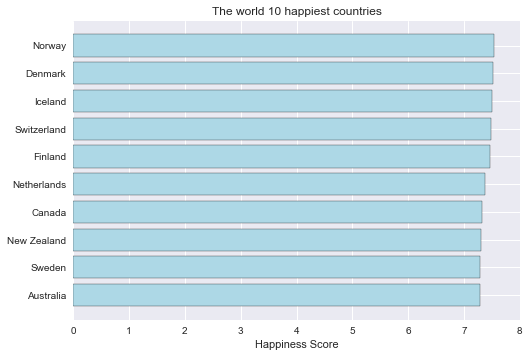

In [16]:
#Obtain a horizontal bar plot of the Happiness Score of the top 10 countries. Your bar chart has to satisfy some specific criteria:
happiest = happiness.sort_values(by = 'Happiness Rank').head(10)[['Happiness Rank', 'Happiness Score', 'Country']]
plt.barh(np.arange(len(happiest))[::-1], happiest['Happiness Score'], color = 'lightblue', edgecolor = 'black')
plt.xticks(range(0,9))
plt.yticks(np.arange(len(happiest)), np.array(happiest['Country'])[::-1])
plt.xlabel('Happiness Score')
plt.title('The world 10 happiest countries')

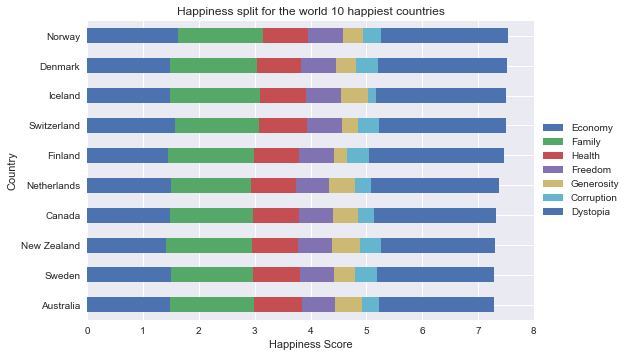

In [17]:
#You will now modify the bar chart you obtained in step 1 to turn into a stacked bar chart where the overall happiness score is divided into the seven parts corresponding to the columns: Economy, Family, Health, Freedom, Generosity, Corruption, Dystopia. Choose a distinct color for each category and include an appropriate legend with your chart.
happiest_stacked = happiness.sort_values(by = 'Happiness Rank', ascending=False).tail(10).set_index(['Country'])[['Economy', 'Family', 'Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia']]
happiest_stacked.plot.barh(stacked=True)
plt.xticks(np.arange(0,9))
plt.xlabel('Happiness Score')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Happiness split for the world 10 happiest countries')

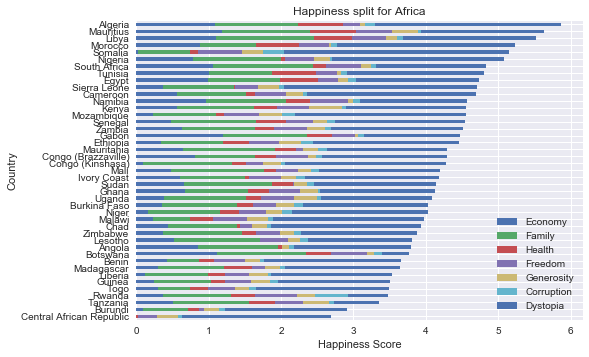

In [18]:
#Obtain the same stacked horizontal bar chart as in step 2 but this time instead of the top 10 countries consider all countries from the region Africa.
africa_stacked = happiness[happiness['Region']=='Africa'].set_index(['Country'])[['Economy', 'Family', 'Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia']][::-1]
africa_stacked.plot.barh(stacked=True)
plt.xticks(np.arange(0,7))
plt.xlabel('Happiness Score')
plt.legend(loc='lower right')
plt.title('Happiness split for Africa')

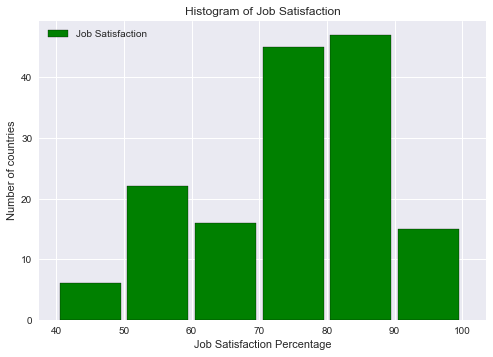

In [19]:
#Obtain a histogram of the Job Satisfaction using some specific categories categories:
happiness[['Job Satisfaction']].plot.hist(bins = np.arange(40,110,10)+0.5, width = 9, color = 'green', edgecolor = 'black')
plt.xlabel('Job Satisfaction Percentage')
plt.ylabel('Number of countries')
plt.title('Histogram of Job Satisfaction')

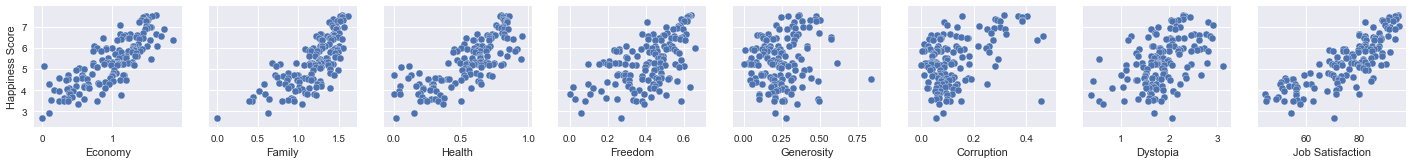

In [20]:
#Obtain scatter plots of the Happiness Score versus each of the other variables. Your plots should be displayed as multiple plots table and obtained with one command as supposed to separate commands for each plot.
sns.pairplot(happiness, x_vars = ['Economy', 'Family', 'Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia', 'Job Satisfaction'], y_vars = ['Happiness Score'])

In [21]:
#Obtain the correlation between the Happiness Score and each of the other variables. Which variable has the highest correlation with the Happiness Score?
happiness_corr = happiness.corr().loc[['Economy', 'Family', 'Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia', 'Job Satisfaction']].sort_values(by = 'Happiness Score', ascending=False)[['Happiness Score']]
happiness_corr.columns = ['Correlation with Happiness Score']
happiness_corr #The variable with the highest correlation is 'Job Satisfaction'

,Correlation with Happiness Score
Job Satisfaction,0.812873
Economy,0.808678
Health,0.777731
Family,0.749612
Freedom,0.567948
Dystopia,0.481117
Corruption,0.438262
Generosity,0.164123


In [22]:
#Compute the probability that randomly selected country with Happiness score over 6.0 is from Western Europe. You will have to use pandas to count the appropriate quantities.
we = happiness[happiness['Region']=='Western Europe']
six = happiness[happiness['Happiness Score']>6]
prob_WE = len(we)/len(happiness)
prob_six = len(six)/len(happiness)
prob_6WE = len(we[we['Happiness Score']>6])/len(we)
prob_WE6 = len(six[six['Region']=='Western Europe'])/len(six)
prob_WE6 #Obstained probability of 0.38636363
#Same result using Bayes' theorem: prob_WE6 = prob_6WE*prob_WE/prob_six = 0.38636363...

0.38636363636363635

In [23]:
#Define a matrix whose rows correspond to countries and the columns to the regions. Fill in the matrix with 0/1 values where entry (i,j) is a 1 if the country in row i is in the region in column j and a 0 otherwise
full_matrix = happiness['Country'].values.reshape(len(happiness),1) + happiness['Region'].unique().reshape(1,len(happiness['Region'].unique()))
search_vector = happiness['Country'].values.reshape(len(happiness),1) + happiness['Region'].values.reshape(len(happiness),1)
full_matrix[full_matrix!=search_vector] = 0
full_matrix[full_matrix==search_vector] = 1
full_matrix

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
 